In [1]:
#typical imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Questions.csv")

In [2]:
df.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,77434,14008.0,2008-09-16T21:40:29Z,171,How to access the last value in a vector?,<p>Suppose I have a vector that is nested in a...
1,79709,NaN,2008-09-17T03:39:16Z,3,Worse sin: side effects or passing massive obj...,<p>I have a function inside a loop inside a fu...
2,95007,15842.0,2008-09-18T17:59:19Z,56,Explain the quantile() function in R,<p>I've been mystified by the R quantile funct...
3,103312,NaN,2008-09-19T16:09:26Z,4,How to test for the EOF flag in R?,<p>How can I test for the <code>EOF</code> fla...
4,255697,1941213.0,2008-11-01T15:48:30Z,4,Is there an R package for learning a Dirichlet...,<p>I'm looking for a an <code>R</code> package...


In [3]:
df.shape

(189930, 6)

In [47]:
#will perform analysis on the titles
sentences = df['Title']

In [54]:
type(sentences)

pandas.core.series.Series

the title and body columns are the ones we will focus on. 

## Preprocessing

since the body is full of html tags and other symbols my hypothesis is the removing stop words and tokenization combined will provide better results. I do not think the stemming is as applicable in this circumstance because many mathematical terms can be derived from another so I wouldn't want to lose any of that accuracy.

In [50]:
#going to use the nltk library
import nltk
import string

We want to remove all irrevlenvant characters i.e. characters that are not words. 

In [56]:
#method to remove punctuation
def remove_punctuation(text):
    for p in string.punctuation:
        text = text.replace(p, '')
    return text

In [57]:
sentences = sentences.apply(remove_punctuation)

In [58]:
print(sentences)

0                  How to access the last value in a vector
1         Worse sin side effects or passing massive objects
2                        Explain the quantile function in R
3                         How to test for the EOF flag in R
4         Is there an R package for learning a Dirichlet...
                                ...                        
189925    GET command in httr not returning anything aft...
189926    Rshiny Discrete value supplied to continuous s...
189927    Confidence interval for quantile regression us...
189928        Time lag analysis on list of imputed datasets
189929    How do I conditionally format text in Shiny gi...
Name: Title, Length: 189930, dtype: object


In [6]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [59]:
sentences_t = sentences.apply(lambda row: nltk.word_tokenize(row))

In [60]:
sentences_swr = sentences_t.apply(lambda row: ' '.join([word for word in row if word not in stop_words]))

In [61]:
print(sentences_swr)

0                              How access last value vector
1            Worse sin side effects passing massive objects
2                               Explain quantile function R
3                                       How test EOF flag R
4         Is R package learning Dirichlet prior counts data
                                ...                        
189925          GET command httr returning anything minutes
189926      Rshiny Discrete value supplied continuous scale
189927    Confidence interval quantile regression using ...
189928              Time lag analysis list imputed datasets
189929    How I conditionally format text Shiny given lo...
Name: Title, Length: 189930, dtype: object


In [62]:
sentences_swr_token = sentences_swr.apply(lambda row: nltk.word_tokenize(row))

In [63]:
print(sentences_swr_token)

0                        [How, access, last, value, vector]
1         [Worse, sin, side, effects, passing, massive, ...
2                          [Explain, quantile, function, R]
3                                 [How, test, EOF, flag, R]
4         [Is, R, package, learning, Dirichlet, prior, c...
                                ...                        
189925    [GET, command, httr, returning, anything, minu...
189926    [Rshiny, Discrete, value, supplied, continuous...
189927    [Confidence, interval, quantile, regression, u...
189928       [Time, lag, analysis, list, imputed, datasets]
189929    [How, I, conditionally, format, text, Shiny, g...
Name: Title, Length: 189930, dtype: object


## Learning Word Vectors

In [9]:
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA

In [71]:
# create and save word vector model
model = Word2Vec(sentences_swr_token, min_count=1)
word_vectors = model.wv

In [73]:
word_vectors.save('vectors')

In [74]:
embeddings = KeyedVectors.load('vectors')

In [76]:
embeddings['R']

array([ 1.1892891 , -0.44767565,  0.37047789,  1.3280928 ,  0.2890859 ,
       -0.45778224,  0.4455568 ,  1.0117848 , -0.8839258 , -0.15524048,
        0.3934442 , -1.4533864 , -2.0713816 ,  0.8332579 , -0.8350278 ,
       -0.4798759 ,  0.9126028 ,  0.34735987, -1.2214557 , -1.0737244 ,
        0.5645107 ,  0.17325312,  0.16622   , -0.94628173,  0.12924652,
       -1.1194444 , -0.53174835, -0.31515577,  0.11463273,  0.2134124 ,
       -0.64194745,  0.29631203,  1.8035247 , -0.27188075, -0.34696975,
        0.09025238,  1.1750368 , -1.3671399 , -0.7742985 , -1.7369684 ,
       -1.1717737 , -0.4586923 , -0.2998911 , -0.41640532, -0.05557929,
        0.95356685,  0.07469657,  0.40770763, -0.9044978 ,  0.41691643,
       -0.55010253,  0.08515386, -0.468659  ,  0.00778967,  1.1612977 ,
        0.28976533,  0.24886583,  0.5411035 , -0.6854156 ,  1.4446943 ,
        0.19880776,  0.13467711, -0.3723376 ,  0.49631882, -0.25584975,
        0.43098533,  0.3290041 ,  0.26512018,  0.37236983,  0.82

All other word embeddings can be viewed in this manner.

## Topic Modelling

In [80]:
import gensim
from gensim import corpora

In [81]:
#creating vocabulary dictionary
dictionary = corpora.Dictionary(sentences_swr_token)
doc_term_matrix = [dictionary.doc2bow(x) for x in sentences_swr_token]

In [82]:
#creating LDA model
LDA = gensim.models.ldamodel.LdaModel
ldamodel = LDA(corpus=doc_term_matrix, num_topics=10, id2word=dictionary, random_state=1, passes=50)

In [83]:
#checking topics
ldamodel.print_topics()

[(0,
  '0.095*"How" + 0.057*"I" + 0.057*"R" + 0.028*"use" + 0.025*"shiny" + 0.022*"object" + 0.020*"get" + 0.016*"set" + 0.014*"model" + 0.013*"way"'),
 (1,
  '0.071*"R" + 0.067*"variable" + 0.061*"loop" + 0.023*"name" + 0.023*"r" + 0.022*"output" + 0.019*"input" + 0.019*"Using" + 0.015*"using" + 0.015*"Can"'),
 (2,
  '0.092*"R" + 0.044*"file" + 0.028*"How" + 0.027*"table" + 0.021*"date" + 0.021*"files" + 0.019*"using" + 0.017*"text" + 0.014*"format" + 0.012*"csv"'),
 (3,
  '0.063*"R" + 0.051*"matrix" + 0.034*"list" + 0.031*"How" + 0.026*"vector" + 0.020*"elements" + 0.016*"working" + 0.016*"1" + 0.016*"inside" + 0.015*"length"'),
 (4,
  '0.049*"R" + 0.047*"plot" + 0.035*"Shiny" + 0.034*"ggplot2" + 0.030*"How" + 0.029*"ggplot" + 0.023*"dplyr" + 0.022*"using" + 0.021*"time" + 0.013*"datatable"'),
 (5,
  '0.106*"data" + 0.060*"column" + 0.051*"R" + 0.044*"values" + 0.042*"dataframe" + 0.040*"columns" + 0.033*"frame" + 0.030*"rows" + 0.029*"How" + 0.028*"based"'),
 (6,
  '0.072*"R" + 0.02

In [84]:
#visualization libraries
import pyLDAvis
import pyLDAvis.gensim_models
import seaborn as sns

Downloading my file will allow you scroll over each topic to view the most relevant tokens.

In [85]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
vis

/home/anthony/anaconda3/envs/condaENV/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/home/anthony/anaconda3/envs/condaENV/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/anthony/anaconda3/envs/condaENV/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/anthony/anaconda3/envs/condaENV/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reloa

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.172687 -0.067696       1        1  16.165966
4      0.201994 -0.014191       2        1  13.333687
0      0.181962  0.071290       3        1  11.182799
2      0.072558 -0.032783       4        1  10.115707
9     -0.168012 -0.151012       5        1   9.989372
8     -0.106690 -0.186610       6        1   8.892083
3      0.059599  0.138499       7        1   8.439818
6     -0.077355  0.019384       8        1   8.006974
1     -0.141743 -0.085695       9        1   7.261194
7     -0.195003  0.308813      10        1   6.612399, topic_info=            Term          Freq         Total Category  logprob  loglift
22          data  20159.000000  20159.000000  Default  30.0000  30.0000
14      function  13224.000000  13224.000000  Default  29.0000  29.0000
268       column  11542.000000  11542.000000  Default  28.0000  28.0000
0            How  29303.000000  29303.000000  Default  27.0000  27.0000
24       package   7630.000000   7630.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
649   equivalent    431.005713    431.931595  Topic10  -5.1995   2.7141
975   dataframes   1298.777914   1753.647958  Topic10  -4.0964   2.4159
13             R   5333.851672  81550.170287  Topic10  -2.6838  -0.0109
4         vector    879.007965   4696.842858  Topic10  -4.4868   1.0404
1394       array    529.215844    801.667031  Topic10  -4.9942   2.3009

[437 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2131      7  0.999412      0
912       7  0.999398      1
555       2  0.271010      2
555       7  0.728480      2
1322     10  0.997993      3
...     ...       ...    ...
656       4  0.999339  write
1761      4  0.997663  wrong
1235      2  0.999499      x
1197      4  0.997450   year
2593      7  0.997280   zero

[459 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 1, 3, 10, 9, 4, 7, 2, 8])

In [86]:
#perplexity is a measure of how good the model is lower is better.
print('Perplexity: ', ldamodel.log_perplexity(doc_term_matrix))

Perplexity:  -8.574423589323509


In [87]:
#coherence score
coherence_ldamodel = gensim.models.CoherenceModel(model=ldamodel, texts=sentences_swr_token, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_ldamodel.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.3003250898001881


This number of topics was chosen arbitrarely. However using coherence values we may be able to select a better number of topics. We want to select the number of topics which maximizes the coherence score.

In [90]:
#method for computing coherence values over a range of different topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherenceModel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherenceModel.get_coherence())
    
    return model_list, coherence_values

In [91]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=sentences_swr_token, start=2, limit=30, step=1)

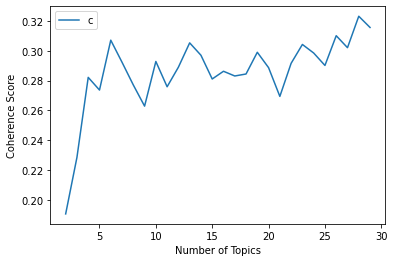

In [96]:
#plot
x = range(2, 30, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [95]:
#printing coherence scores
for m, cv in zip(x, coherence_values):
    print("Number of Topics: ", m, ", Coherence Score: ", round(cv, 4))

Number of Topics:  2 , Coherence Score:  0.1906
Number of Topics:  3 , Coherence Score:  0.2285
Number of Topics:  4 , Coherence Score:  0.2822
Number of Topics:  5 , Coherence Score:  0.2737
Number of Topics:  6 , Coherence Score:  0.3071
Number of Topics:  7 , Coherence Score:  0.2923
Number of Topics:  8 , Coherence Score:  0.2771
Number of Topics:  9 , Coherence Score:  0.2629
Number of Topics:  10 , Coherence Score:  0.2929
Number of Topics:  11 , Coherence Score:  0.2759
Number of Topics:  12 , Coherence Score:  0.289
Number of Topics:  13 , Coherence Score:  0.3053
Number of Topics:  14 , Coherence Score:  0.297
Number of Topics:  15 , Coherence Score:  0.2811
Number of Topics:  16 , Coherence Score:  0.2863
Number of Topics:  17 , Coherence Score:  0.2831
Number of Topics:  18 , Coherence Score:  0.2845
Number of Topics:  19 , Coherence Score:  0.299
Number of Topics:  20 , Coherence Score:  0.2887
Number of Topics:  21 , Coherence Score:  0.2694
Number of Topics:  22 , Coheren

## Summary

The LDA is a popular tool for text analysis. However it is difficult to evaluate whether the model is actually creating human interpretable topics. This is because LDA has an unsupervised training process. There is also no standard list of topics to compare against every corpus. This is why we use perplexity and coherence. The perplexity is a measure of how suprised the model is by data it has not yet seen before. It is measured as the normalized log likelihood of a held out test set. However since this metric is also not super correlated with human judgement the need for another metric is required. This is where topic coherence applies. Topic coherence measueres the score of a single topic based on its semantic simularity between high scoring words in the topic. 

The highest coherence score was 0.3232 for 28 topics, so in future it would be ideal to implement the lda model with 28 topics for best results.